✅ Données 'credit_scoring.csv' chargées.
Taille de l'échantillon complet: 4375 individus et 13 variables
✅ Séparation Train/Test (50/50) effectuée. Train: 2187 | Test: 2188

QUESTION 2: COMPARAISON AVEC DONNÉES BRUTES

--- Comparaison des classifieurs (Brut) ---
--- Résultats CART (Brut) ---
Matrice de confusion:
[[ 325  279]
 [ 318 1266]]
Accuracy: 0.7271 | Rappel: 0.7271 | Score final (Acc+Recall)/2: 0.7271


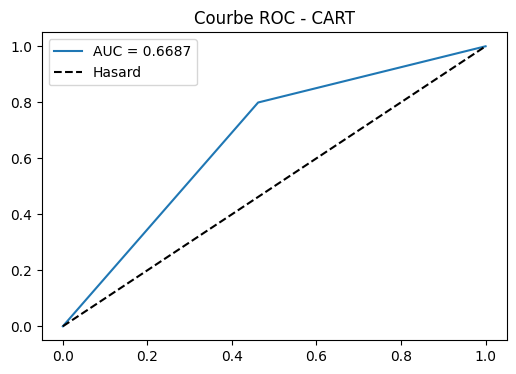

--- Résultats KNN (k=5) (Brut) ---
Matrice de confusion:
[[ 189  415]
 [ 187 1397]]
Accuracy: 0.7249 | Rappel: 0.7249 | Score final (Acc+Recall)/2: 0.7249


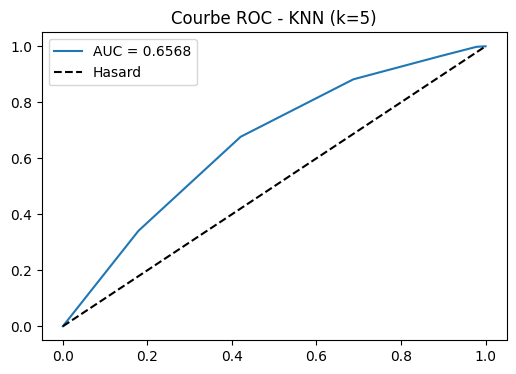

--- Résultats MLP (40-20) (Brut) ---
Matrice de confusion:
[[ 273  331]
 [ 280 1304]]
Accuracy: 0.7207 | Rappel: 0.7207 | Score final (Acc+Recall)/2: 0.7207


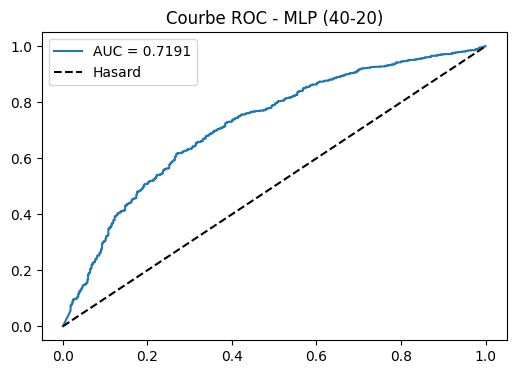


🏆 MEILLEUR: CART (Score final: 0.7271)
✅ Données standardisées (StandardScaler).

QUESTION 3: COMPARAISON AVEC DONNÉES NORMALISÉES

--- Comparaison des classifieurs (Normalisé) ---
--- Résultats CART (Normalisé) ---
Matrice de confusion:
[[ 322  282]
 [ 315 1269]]
Accuracy: 0.7271 | Rappel: 0.7271 | Score final (Acc+Recall)/2: 0.7271


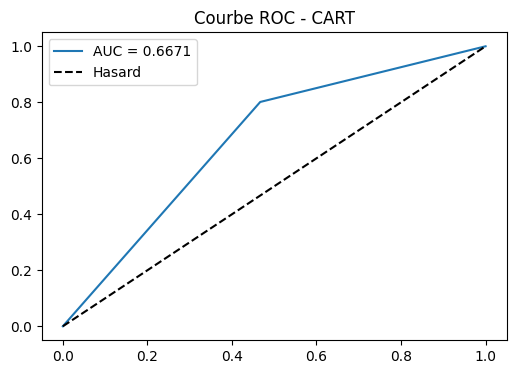

--- Résultats KNN (k=5) (Normalisé) ---
Matrice de confusion:
[[ 286  318]
 [ 223 1361]]
Accuracy: 0.7527 | Rappel: 0.7527 | Score final (Acc+Recall)/2: 0.7527


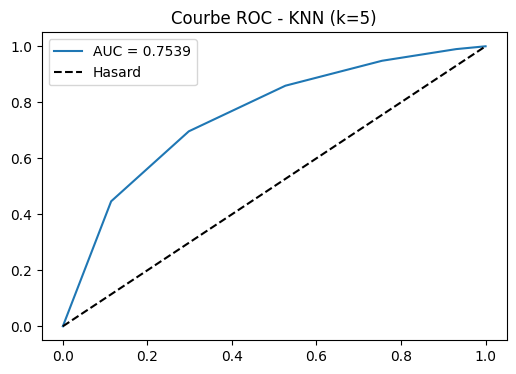

--- Résultats MLP (40-20) (Normalisé) ---
Matrice de confusion:
[[ 331  273]
 [ 286 1298]]
Accuracy: 0.7445 | Rappel: 0.7445 | Score final (Acc+Recall)/2: 0.7445


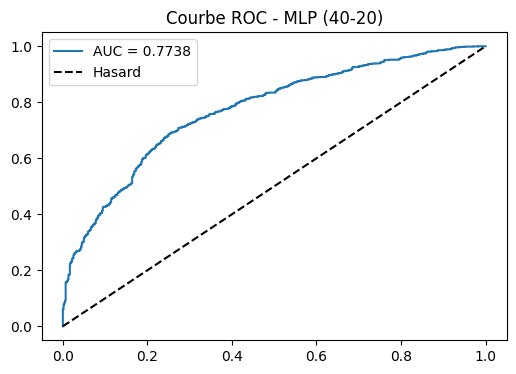


🏆 MEILLEUR: KNN (k=5) (Score final: 0.7527)
✅ ACP terminée. Dimensions après concaténation: (2187, 16)
Variance totale expliquée par les 3 PC: 44.14%

QUESTION 4: COMPARAISON AVEC DONNÉES NORMALISÉES + ACP

--- Comparaison des classifieurs (Normalisé + ACP) ---
--- Résultats CART (Normalisé + ACP) ---
Matrice de confusion:
[[ 335  269]
 [ 331 1253]]
Accuracy: 0.7258 | Rappel: 0.7258 | Score final (Acc+Recall)/2: 0.7258


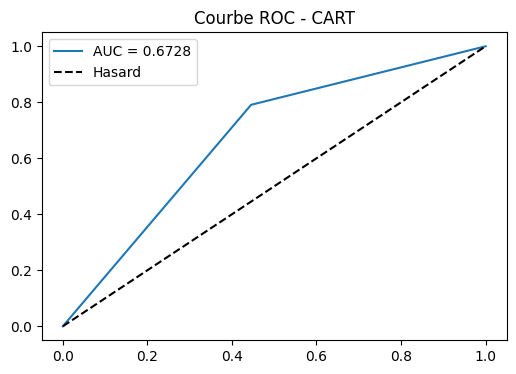

--- Résultats KNN (k=5) (Normalisé + ACP) ---
Matrice de confusion:
[[ 283  321]
 [ 212 1372]]
Accuracy: 0.7564 | Rappel: 0.7564 | Score final (Acc+Recall)/2: 0.7564


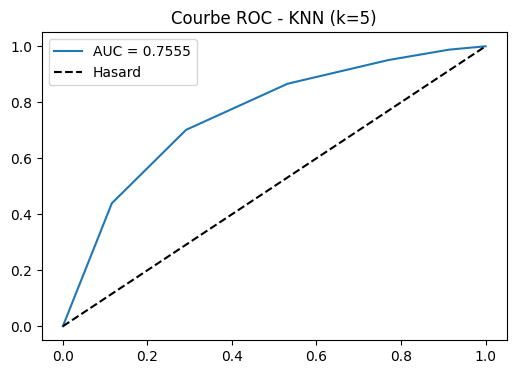

--- Résultats MLP (40-20) (Normalisé + ACP) ---
Matrice de confusion:
[[ 318  286]
 [ 261 1323]]
Accuracy: 0.7500 | Rappel: 0.7500 | Score final (Acc+Recall)/2: 0.7500


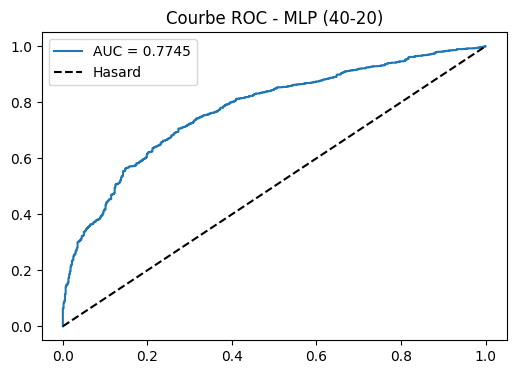


🏆 MEILLEUR: KNN (k=5) (Score final: 0.7564)

Variables triées par importance :
['Income' 'Seniority' 'PC2' 'PC3' 'Price' 'PC1' 'Amount' 'Age' 'Records'
 'Assets' 'Expenses' 'Job' 'Time' 'Debt' 'Home' 'Marital']


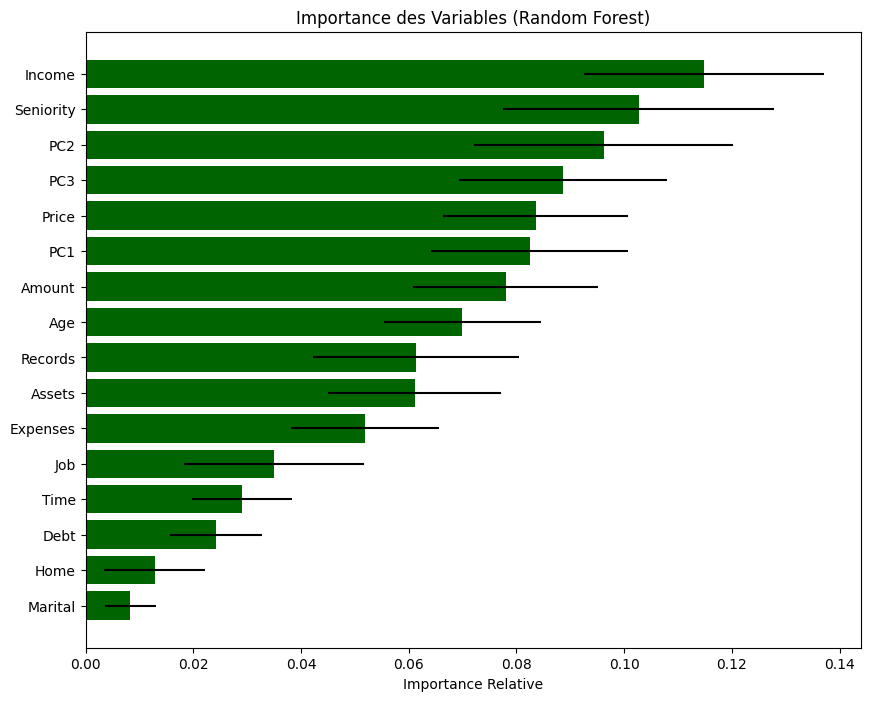


🔄 Détermination du nombre optimal de variables (avec KNN (k=5))...
Meilleure Accuracy: 0.7358 (avec 16 variables)


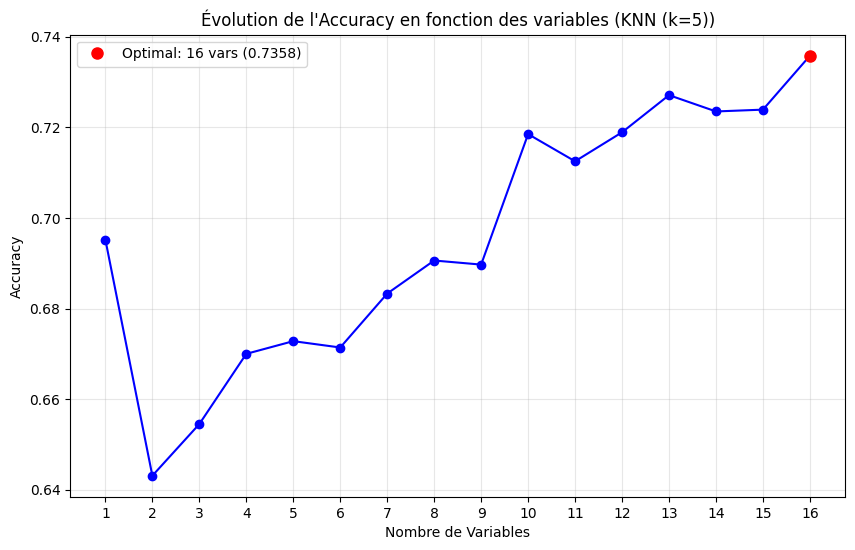

Le nombre optimal de variables à conserver est : 16

🔄 Recherche des meilleurs hyperparamètres (GridSearchCV)...

✅ Recherche terminée en 26.92 secondes.
   Meilleurs paramètres: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 15)}

################################################################################
ORCHESTRATION DU PIPELINE (Q1 à Q8) : Création du Pipeline Final
################################################################################

################################################################################
ORCHESTRATION DU PIPELINE (Q1 à Q8)
################################################################################

[Étape 1] Préparation des données: Normalisation + ACP...
[Étape 2] Sélection de variables (RF + MLP)...

Variables triées par importance :
['Income' 'Seniority' 'PC2' 'PC3' 'Price' 'PC1' 'Amount' 'Age' 'Records'
 'Assets' 'Expenses' 'Job' 'Time' 'Debt' 'Home' 'Marital']


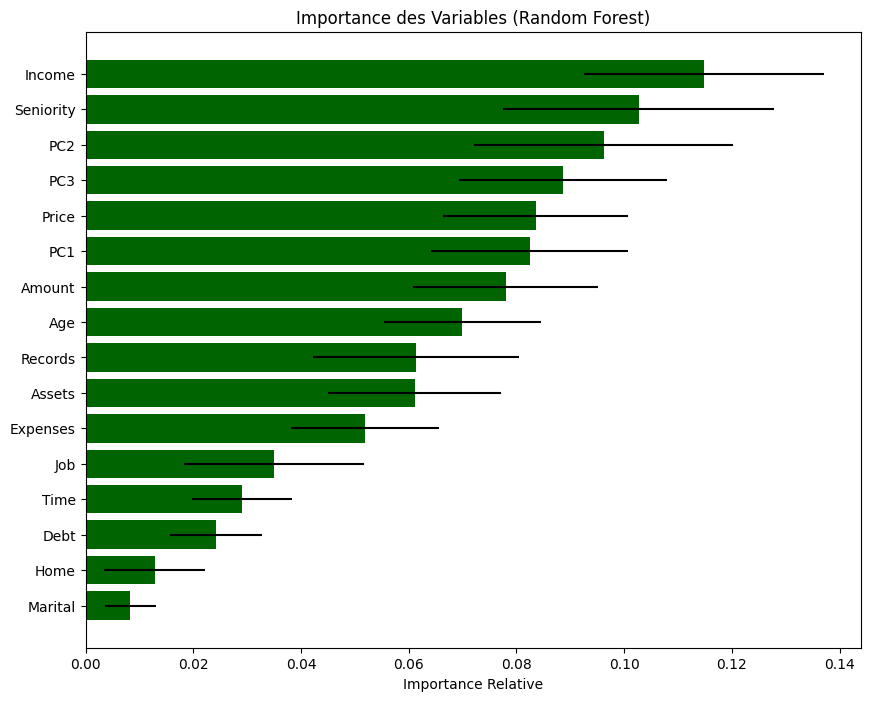


🔄 Détermination du nombre optimal de variables (avec MLP)...


TypeError: sklearn.neural_network._multilayer_perceptron.MLPClassifier() got multiple values for keyword argument 'max_iter'

In [1]:
from sklearn.ensemble import RandomForestClassifier
# ====================================================================
# Algorithmes et Analyse de données - Atelier Apprentissage Supervisé
# ====================================================================

# --- Configuration et Imports ---
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Importez votre fichier utilitaire
import utils 

warnings.filterwarnings('ignore')
np.set_printoptions(threshold=10000, suppress=True)

# Définition des classifieurs initiaux (Q2)
classifiers_q2 = {
    'CART': DecisionTreeClassifier(random_state=1),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'MLP (40-20)': MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1, max_iter=1000)
}
mlp_base_params = {'hidden_layer_sizes': (40, 20), 'max_iter': 1000, 'random_state': 1}

# ====================================================================
# PARTIE I : APPRENTISSAGE SUPERVISÉ - credit_scoring.csv
# ====================================================================

## Question 1: Chargement des données et préparation

# Chargement des données (Assurez-vous que le chemin TPs/ est correct)
df = pd.read_csv("./credit_scoring.csv", sep=';', engine='python')
print("✅ Données 'credit_scoring.csv' chargées.")

# Transformer en numpy Array et séparer X et Y
X = df.values[:, :-1]  # Variables caractéristiques
Y = df.values[:, -1]   # Variable à prédire (Status)

print(f"Taille de l'échantillon complet: {X.shape[0]} individus et {X.shape[1]} variables")

# Séparer les données en apprentissage (50%) et test (50%)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.5, random_state=1
)

print(f"✅ Séparation Train/Test (50/50) effectuée. Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")

## Question 2: Apprentissage et évaluation de modèles (Sans Prétraitement)

print("\n" + "="*80)
print("QUESTION 2: COMPARAISON AVEC DONNÉES BRUTES")
print("="*80)
meilleur_nom_q2, meilleur_modele_q2 = utils.run_classifiers_train_test(
    classifiers_q2, X_train, Y_train, X_test, Y_test, mode='Brut'
)

## Question 3: Normalisation des variables continues

# Normaliser les données 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Données standardisées (StandardScaler).")

# Exécuter à nouveau les classifieurs sur les données normalisées
print("\n" + "="*80)
print("QUESTION 3: COMPARAISON AVEC DONNÉES NORMALISÉES")
print("="*80)
meilleur_nom_q3, meilleur_modele_q3 = utils.run_classifiers_train_test(
    classifiers_q2, X_train_scaled, Y_train, X_test_scaled, Y_test, mode='Normalisé'
)

## Question 4: Création de nouvelles variables (ACP)

# Application de l'ACP (sur données déjà scalées)
pca = PCA(n_components=3, random_state=1)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Concaténer les données originales scalées avec les 3 composantes principales
X_train_with_pca = np.concatenate([X_train_scaled, X_train_pca], axis=1)
X_test_with_pca = np.concatenate([X_test_scaled, X_test_pca], axis=1)

print(f"✅ ACP terminée. Dimensions après concaténation: {X_train_with_pca.shape}")
print(f"Variance totale expliquée par les 3 PC: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Exécuter à nouveau les classifieurs sur les données normalisées + ACP
print("\n" + "="*80)
print("QUESTION 4: COMPARAISON AVEC DONNÉES NORMALISÉES + ACP")
print("="*80)
meilleur_nom_q4, meilleur_modele_q4 = utils.run_classifiers_train_test(
    classifiers_q2, X_train_with_pca, Y_train, X_test_with_pca, Y_test, mode='Normalisé + ACP'
)

## Question 5: Sélection de variables (K Optimal)

# Définir la liste des noms de colonnes (13 originales + 3 PCA)
nom_cols_pca = list(df.columns[:-1]) + ['PC1', 'PC2', 'PC3']

# 1. Importance des variables (Q5 - Partie 1)
sorted_idx, feature_names = utils.importance_des_variables(X_train_with_pca, Y_train, nom_cols_pca)

# 2. Sélection du nombre optimal de variables (Q5 - Partie 2)
optimal_features_count = utils.selection_nombre_optimal_variables(
    X_train_with_pca, X_test_with_pca, Y_train, Y_test, sorted_idx, meilleur_nom_q4, mlp_base_params
)

# Stocker les K indices sélectionnés pour la Q6 et Q7
best_k_indices = sorted_idx[:optimal_features_count] 
print(f"Le nombre optimal de variables à conserver est : {optimal_features_count}")

## Question 6: Paramétrage des classifieurs (Tuning du MLP)

# Préparer le jeu de données avec SEULEMENT les K variables optimales
X_train_selected_for_tuning = X_train_with_pca[:, best_k_indices]

# Définition de la grille de tuning pour le MLP (Q6)
base_mlp = MLPClassifier(random_state=1, max_iter=1000)
param_grid_mlp = {
    'hidden_layer_sizes': [(30, 15), (40, 20), (50, 25)], 
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01] 
}

# Exécuter la recherche GridSearchCV
tuned_mlp, best_mlp_params = utils.recherche_meilleurs_parametres(
    X_train_selected_for_tuning, Y_train, base_mlp, param_grid_mlp
)

## Question 7 & 8: Création du Pipeline et Orchestration

print("\n" + "#"*80)
print("ORCHESTRATION DU PIPELINE (Q1 à Q8) : Création du Pipeline Final")
print("#"*80)

# L'orchestration exécute Q1->Q7 et sauvegarde le pipeline
final_pipeline_orchestre = utils.pipeline_generation_train_test_split(
    df, X_train, Y_train, X_test, Y_test
)

# Validation Finale sur le jeu de test
Y_pred_pipe = final_pipeline_orchestre.predict(X_test)
Y_proba_pipe = final_pipeline_orchestre.predict_proba(X_test)[:, 1]

print("\n--- Validation Finale du Pipeline Orchestré ---")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_pipe):.4f}")
print(f"AUC: {roc_auc_score(Y_test, Y_proba_pipe):.4f}")
print(f"\n✅ Pipeline de l'API (Q9) sauvegardé sous 'credit_scoring_pipeline.pkl'.")


## Question 10: Comparaison avec Validation Croisée (CV) et Orchestration Finale

# 1. Comparaison par CV (sur X et Y bruts complets)
X_data_q10 = df.iloc[:, :-1].values
Y_data_q10 = df.iloc[:, -1].values

best_clf_cv_name, best_ds_cv_name = utils.run_classifiers_cv(X_data_q10, Y_data_q10)

# --- 2. Tuning et Orchestration finale (sur le meilleur CV) ---
# Si le modèle est Random Forest (meilleur probable), on utilise cette grille de tuning
if best_clf_cv_name.startswith('Random Forest'):
    base_clf_q10 = RandomForestClassifier(random_state=1, n_estimators=200, n_jobs=-1)
    param_grid_q10 = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
    
    # Préparer les données d'entraînement complètes (pour le tuning final)
    X_train_full = X_data_q10[train_test_split(range(len(X_data_q10)), test_size=0.5, random_state=1)[0]]
    Y_train_full = Y_data_q10[train_test_split(range(len(Y_data_q10)), test_size=0.5, random_state=1)[0]]
    X_scaled_full = StandardScaler().fit_transform(X_train_full)
    X_pca_full = np.concatenate([X_scaled_full, PCA(n_components=3, random_state=1).fit_transform(X_scaled_full)], axis=1)
    
    tuned_final_clf, best_cv_params = utils.recherche_meilleurs_parametres(
        X_pca_full[:, best_k_indices], Y_train_full, base_clf_q10, param_grid_q10
    )
else:
    tuned_final_clf = tuned_mlp
    best_cv_params = best_mlp_params

# 3. Orchestration Finale CV (Entraînement sur TOUTES les données X_data_q10)
final_pipeline_cv_orchestre = utils.pipeline_generation_cv(
    df, X_data_q10, Y_data_q10, best_clf_cv_name, best_cv_params, optimal_features_count, X_test, Y_test
)

print("\n✅ Partie I (Q1-Q10) complète. Le pipeline de production est sauvegardé sous 'final_production_pipeline_cv.pkl'.")


# ====================================================================
# PARTIE II : DONNÉES HÉTÉROGÈNES - credit.data
# ====================================================================

## Question II.1: Données numériques seules

# Définir les colonnes numériques (indices 0 à 5) et catégorielles (6 à 14) (simulé selon le TP)
col_num = np.arange(6)
col_cat = np.arange(6, 15)

try:
    # Lecture du fichier credit.data (qui utilise '?' pour les valeurs manquantes)
    df_credit_data = pd.read_csv("./credit.data", header=None, na_values='?', sep=',')
except FileNotFoundError:
    print("\n⚠️ Fichier 'credit.data' non trouvé. Simulation avec les premières colonnes de 'credit_scoring.csv'.")
    df_credit_data = df.copy() 
    col_num = np.arange(6)
    col_cat = np.arange(6, 13)

# 1. Préparation des données numériques
X_train_num, X_test_num, Y_train_num, Y_test_num = utils.traitement_donnees_numeriques(df_credit_data, col_num)

# Exécuter run_classifiers (sans normalisation)
classifiers_ii_1 = {'CART': DecisionTreeClassifier(random_state=1), 'KNN (k=5)': KNeighborsClassifier(n_neighbors=5)}
utils.run_classifiers_train_test(classifiers_ii_1, X_train_num, Y_train_num, X_test_num, Y_test_num, mode='II.1 Brut')

# 2. Normalisation et exécution
scaler_ii = StandardScaler()
X_train_num_scaled = scaler_ii.fit_transform(X_train_num)
X_test_num_scaled = scaler_ii.transform(X_test_num)

print("\n" + "="*80)
print("QUESTION II.1 (Suite): COMPARAISON AVEC DONNÉES NORMALISÉES")
print("="*80)
utils.run_classifiers_train_test(classifiers_ii_1, X_train_num_scaled, Y_train_num, X_test_num_scaled, Y_test_num, mode='II.1 Normalisé')

## Question II.2: Données hétérogènes (avec imputation)

# Recharger les données complètes pour l'imputation (X_full, Y_full)
X_full_ii = df_credit_data.values[:, :-1]
Y_full_ii = df_credit_data.values[:, -1]

# Traitement de données hétérogènes par imputation et One-Hot Encoding
X_train_final_ii, X_test_final_ii, Y_train_comb_ii, Y_test_comb_ii = utils.traitement_donnees_heterogenes_imputation(
    X_full_ii, Y_full_ii, col_num, col_cat
)

# Exécuter run_classifiers sur les nouvelles données (Q6)
classifiers_ii_2 = {'CART': DecisionTreeClassifier(random_state=1), 'MLP (20-10)': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1, max_iter=500)}

print("\n" + "="*80)
print("QUESTION II.2: COMPARAISON SUR DONNÉES IMPUTÉES/NORMALISÉES/OHE")
print("="*80)
utils.run_classifiers_train_test(classifiers_ii_2, X_train_final_ii, Y_train_comb_ii, X_test_final_ii, Y_test_comb_ii, mode='II.2 Final')

print("\n✅ Partie II complète.")